# AEW Composite maps
This code generates composites and saves the event indices of AEW passages. Events are defined as 1.5 standard deviations from the mean, in the negative direction, meaning, northerly winds. 
<br>
<br>
Abby Thornton

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from datetime import date
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker


import matplotlib
import pandas as pd
from matplotlib.dates import DateFormatter
import seaborn as sns


from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from metpy.plots import colortables
from metpy.calc import vorticity

In [26]:
file_path = '/glade/scratch/athornton/era5_processed_data/filtered_era5_full_fields/600/v*' 
ds_v = xr.open_mfdataset(file_path)
ds_v = ds_v.V_prime.compute()

In [22]:
file_path = '/glade/scratch/athornton/era5_processed_data/filtered_era5_full_fields/600/u*' 
ds_u = xr.open_mfdataset(file_path)
ds_u = ds_u.U_prime.compute()

In [102]:
#0E, 8N

#reference_point = ds_v.sel(latitude=slice(10.5,5.5), longitude=slice(-2.5,2.5)).mean(dim=['latitude','longitude'])
#reference_point = ds_v.sel(latitude=(ds_v.latitude==8.), longitude=(ds_v.longitude==0.))
reference_point = ds_v.sel(latitude=slice(8.5,7.5), longitude=slice(-0.5,0.5)).mean(dim=['latitude','longitude'])

time = reference_point['time']
sdev = reference_point.std()
threshold = -1.5*sdev

events_index = []

n = int(len(reference_point))
for i in range(1, n-1):

    # Condition for local minima
    if(reference_point[i] <= threshold) and (reference_point[i-1] > reference_point[i] < reference_point[i + 1]):
        events_index.append(i)
        
wave_passage = ds_v[events_index]
# Composite all filtered AEW passages:

In [103]:
v_aew = wave_passage.mean(dim='time', keep_attrs=True)
u_aew = ds_u[events_index].mean(dim='time', keep_attrs=True)
vo = vorticity(u_aew,v_aew)*1.e5

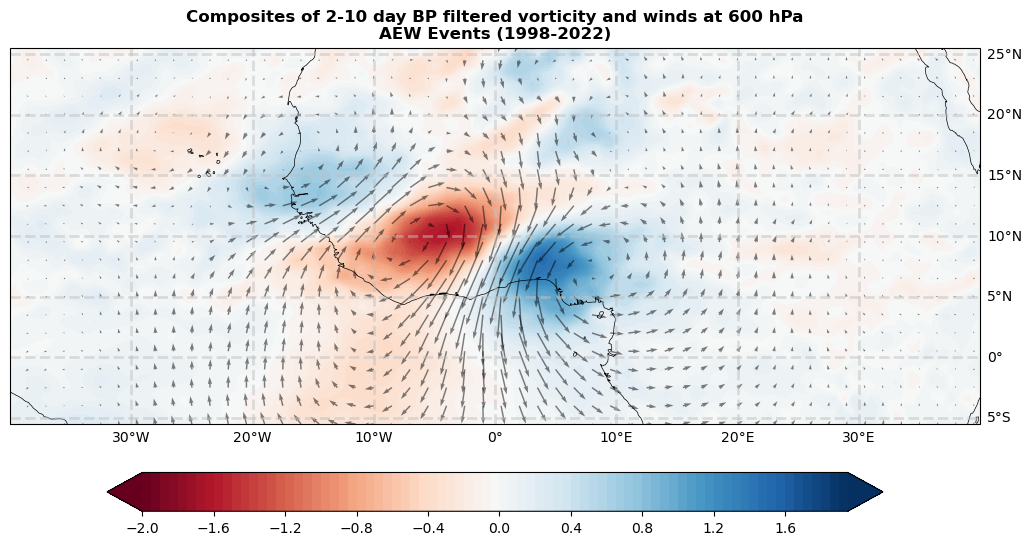

In [101]:
fig, ax = plt.subplots(1,1,figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
projection = ccrs.PlateCarree()

## Quality of image
plt.rcParams['savefig.dpi'] = 255

minlon = -40.
maxlon =  40.
minlat =  -5.5
maxlat =   25.5

# Set axis limits for each index/subplot
ax.set_extent([minlon, maxlon, minlat, maxlat], crs=ccrs.PlateCarree())

# Function below to even out spacing between plots
fig.tight_layout()

# Specify which contour levels to draw
clevs = np.arange(-2,2, 0.05)

# Using a dictionary makes it easy to reuse the same keyword arguments twice for the contours
kwargs = dict(levels=clevs,
              transform=projection,
              cmap='RdBu',
              extend='both',
              negative_linestyles='dashed')

ax.coastlines(linewidths=0.5)
ax.set_title('Composites of 2-10 day BP filtered vorticity and winds at 600 hPa\nAEW Events (1998-2022)', weight='bold', size=12)
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='silver', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True
gl.ylocator = mticker.FixedLocator([-5, 0, 5, 10, 15, 20, 25])
gl.xlocator = mticker.FixedLocator([-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40])


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
cf = ax.contourf(vo.longitude, vo.latitude, vo, **kwargs)
skip = dict(longitude=slice(None,None,3),latitude=slice(None,None,3))
lat_uv=u_aew.isel(skip).latitude
lon_uv=u_aew.isel(skip).longitude
u_values = u_aew.isel(skip)
v_values = v_aew.isel(skip)
ax.quiver(lon_uv, lat_uv, u_values, v_values, width=0.0015, scale=100., transform=projection, color="black", alpha=0.5)# colorbars

cb = plt.colorbar(cf, ax=ax, orientation='horizontal', pad=0.05,
                      shrink=0.8, aspect=20)

#plt.savefig('composites_vo_winds_point.png', bbox_inches='tight')

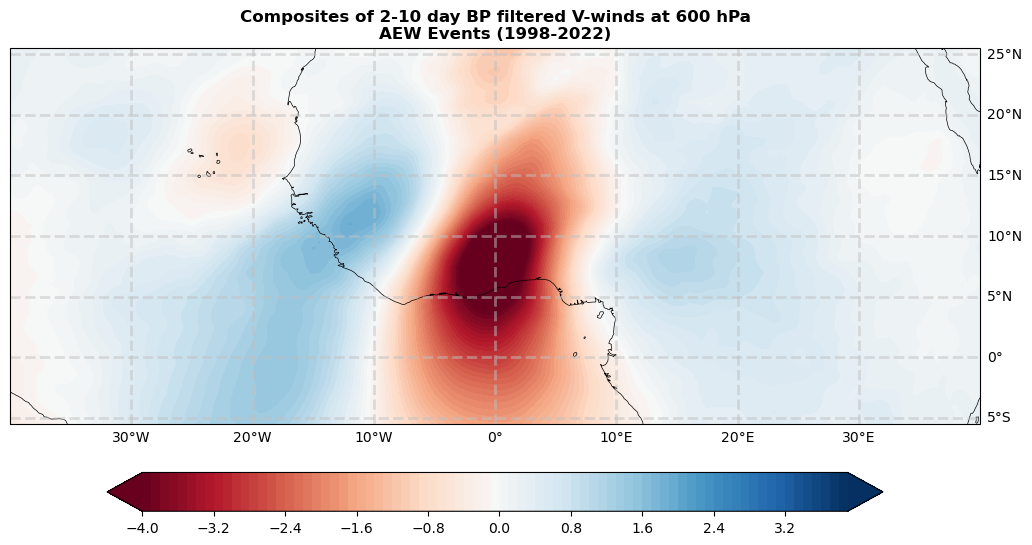

In [107]:
fig, ax = plt.subplots(1,1,figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
projection = ccrs.PlateCarree()

## Quality of image
plt.rcParams['savefig.dpi'] = 255

minlon = -40.
maxlon =  40.
minlat =  -5.5
maxlat =   25.5

# Set axis limits for each index/subplot
ax.set_extent([minlon, maxlon, minlat, maxlat], crs=ccrs.PlateCarree())

# Function below to even out spacing between plots
fig.tight_layout()

# Specify which contour levels to draw
clevs = np.arange(-4,4, 0.1)

# Using a dictionary makes it easy to reuse the same keyword arguments twice for the contours
kwargs = dict(levels=clevs,
              transform=projection,
              cmap='RdBu',
              extend='both',
              negative_linestyles='dashed')

ax.coastlines(linewidths=0.5)
ax.set_title('Composites of 2-10 day BP filtered V-winds at 600 hPa\nAEW Events (1998-2022)', weight='bold', size=12)
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='silver', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True
gl.ylocator = mticker.FixedLocator([-5, 0, 5, 10, 15, 20, 25])
gl.xlocator = mticker.FixedLocator([-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40])


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
cf = ax.contourf(v_aew.longitude, v_aew.latitude, v_aew, **kwargs)
skip = dict(longitude=slice(None,None,3),latitude=slice(None,None,3))
lat_uv=u_aew.isel(skip).latitude
lon_uv=u_aew.isel(skip).longitude
u_values = u_aew.isel(skip)
v_values = v_aew.isel(skip)

cb = plt.colorbar(cf, ax=ax, orientation='horizontal', pad=0.05,
                      shrink=0.8, aspect=20)

plt.savefig('composites_v_winds_1x1.png', bbox_inches='tight')